In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("pulsar_data_train (1).csv")

In [3]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


### Renaming columns

In [4]:
df.rename(columns={" Mean of the integrated profile":"pulse_amplitude",
                 " Standard deviation of the integrated profile":"pulse_amplitude_variation",
                 " Excess kurtosis of the integrated profile":"amplitude_distribution_shape",
                 " Skewness of the integrated profile":"amplitude_distribution_asymmetry",
                 " Mean of the DM-SNR curve":"average_signal_strength",
                 " Standard deviation of the DM-SNR curve":"variability_of_snr",
                 " Excess kurtosis of the DM-SNR curve":"distribution_shape_of_snr",
                 " Skewness of the DM-SNR curve":"asymmetry_of_snr_distribution"},inplace=True)

In [5]:
df.head()

,pulse_amplitude,pulse_amplitude_variation,amplitude_distribution_shape,amplitude_distribution_asymmetry,average_signal_strength,variability_of_snr,distribution_shape_of_snr,asymmetry_of_snr_distribution,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [6]:
df.isnull().sum()

pulse_amplitude                        0
pulse_amplitude_variation              0
amplitude_distribution_shape        1735
amplitude_distribution_asymmetry       0
average_signal_strength                0
variability_of_snr                  1178
distribution_shape_of_snr              0
asymmetry_of_snr_distribution        625
target_class                           0
dtype: int64

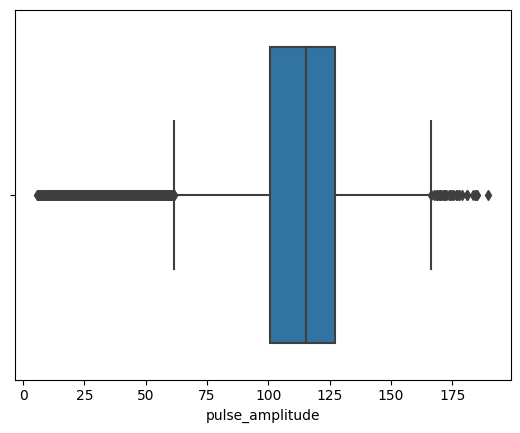

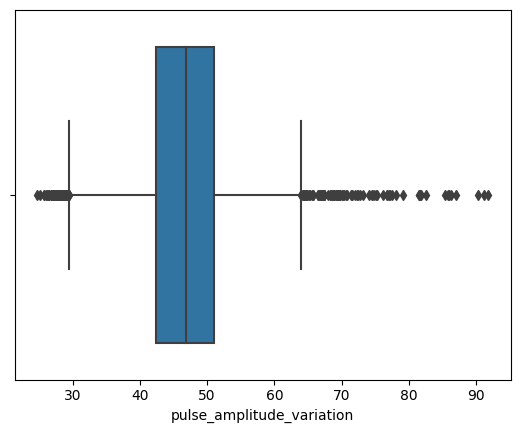

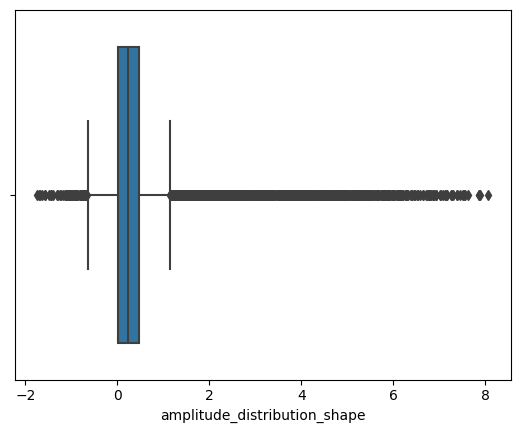

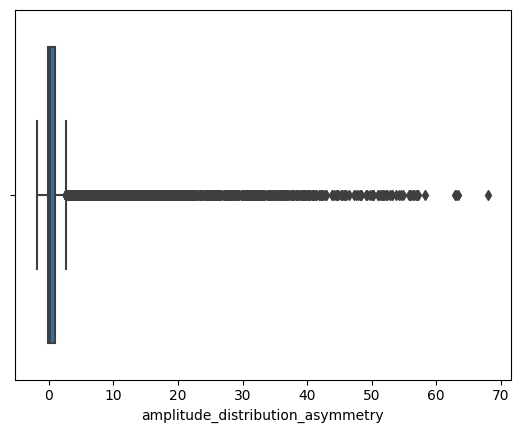

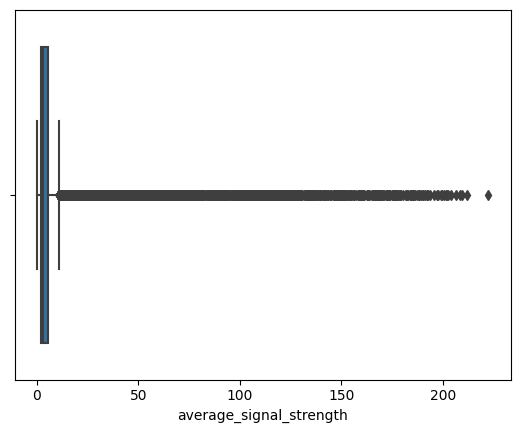

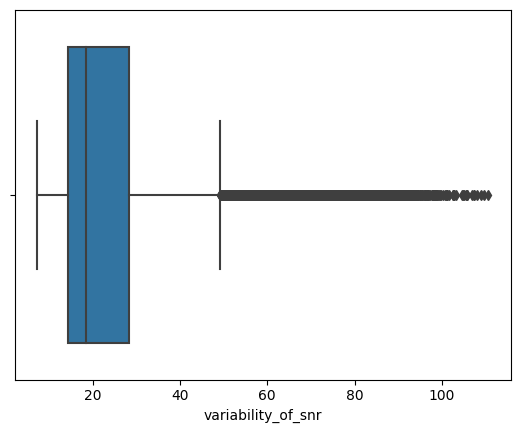

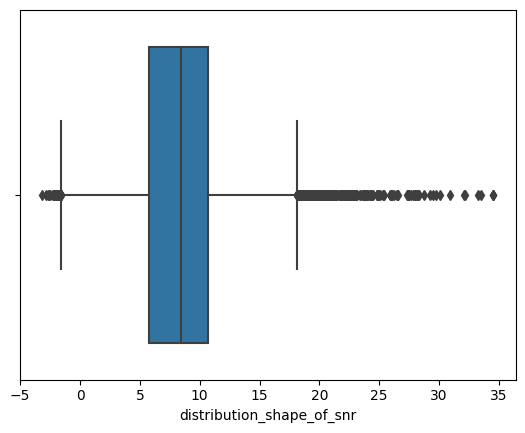

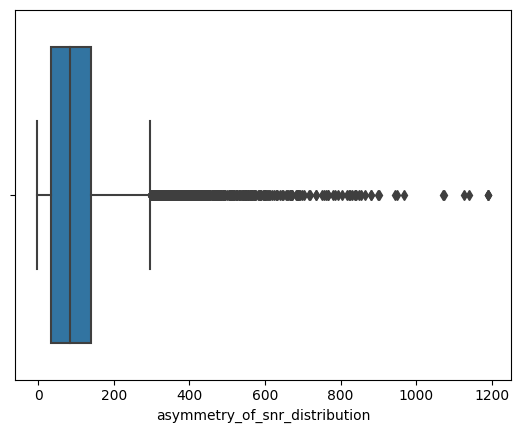

In [7]:
for i in df[['pulse_amplitude',
 'pulse_amplitude_variation',
 'amplitude_distribution_shape',
 'amplitude_distribution_asymmetry',
 'average_signal_strength',
 'variability_of_snr',
 'distribution_shape_of_snr',
 'asymmetry_of_snr_distribution']]:
    sns.boxplot(data = df, x = df[i])
    plt.show()

### In amplitude_distribution_shape ,variability_of_snr,asymmetry_of_snr_distribution columns we have outliers.For this reason we fill this columns with median.

In [8]:
df=df.fillna(df.median())

In [9]:
df.isnull().sum()

pulse_amplitude                     0
pulse_amplitude_variation           0
amplitude_distribution_shape        0
amplitude_distribution_asymmetry    0
average_signal_strength             0
variability_of_snr                  0
distribution_shape_of_snr           0
asymmetry_of_snr_distribution       0
target_class                        0
dtype: int64

### Let's check scale of data

In [10]:
df.describe()

,pulse_amplitude,pulse_amplitude_variation,amplitude_distribution_shape,amplitude_distribution_asymmetry,average_signal_strength,variability_of_snr,distribution_shape_of_snr,asymmetry_of_snr_distribution,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.443251,1.778431,12.674758,25.604827,8.333489,104.408308,0.092034
std,25.672828,6.801077,0.992144,6.208450,29.613230,18.809291,4.535783,104.799639,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.421239,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
columns_to_scale = ['pulse_amplitude', 'pulse_amplitude_variation', 'amplitude_distribution_shape', 
                    'amplitude_distribution_asymmetry', 'average_signal_strength', 'variability_of_snr',
                    'distribution_shape_of_snr', 'asymmetry_of_snr_distribution']

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [13]:
df.describe()

,pulse_amplitude,pulse_amplitude_variation,amplitude_distribution_shape,amplitude_distribution_asymmetry,average_signal_strength,variability_of_snr,distribution_shape_of_snr,asymmetry_of_snr_distribution,target_class
count,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,12528.000000
mean,1.795073e-16,-9.559545e-16,-1.247760e-17,1.843282e-17,7.202980e-17,-8.677605e-17,-3.885072e-16,-8.507456e-18,0.092034
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,0.289085
min,-4.099024e+00,-3.198061e+00,-2.198632e+00,-5.750967e-01,-4.208269e-01,-9.694742e-01,-2.529489e+00,-1.015171e+00,0.000000
25%,-3.961836e-01,-6.115768e-01,-3.884988e-01,-3.167701e-01,-3.635082e-01,-5.765297e-01,-5.579029e-01,-6.324691e-01,0.000000
50%,1.613347e-01,6.022593e-02,-2.213205e-01,-2.537150e-01,-3.337194e-01,-3.824021e-01,2.592993e-02,-2.030814e-01,0.000000
75%,6.258826e-01,6.554613e-01,-2.218737e-02,-1.362806e-01,-2.452213e-01,4.616602e-02,5.279206e-01,2.993132e-01,0.000000
max,3.065329e+00,6.659092e+00,7.686968e+00,1.068315e+01,7.083152e+00,4.521211e+00,5.777922e+00,1.036870e+01,1.000000


### Lets look at correlation.

Text(0.5, 1.0, 'Heatmap of Correlation')

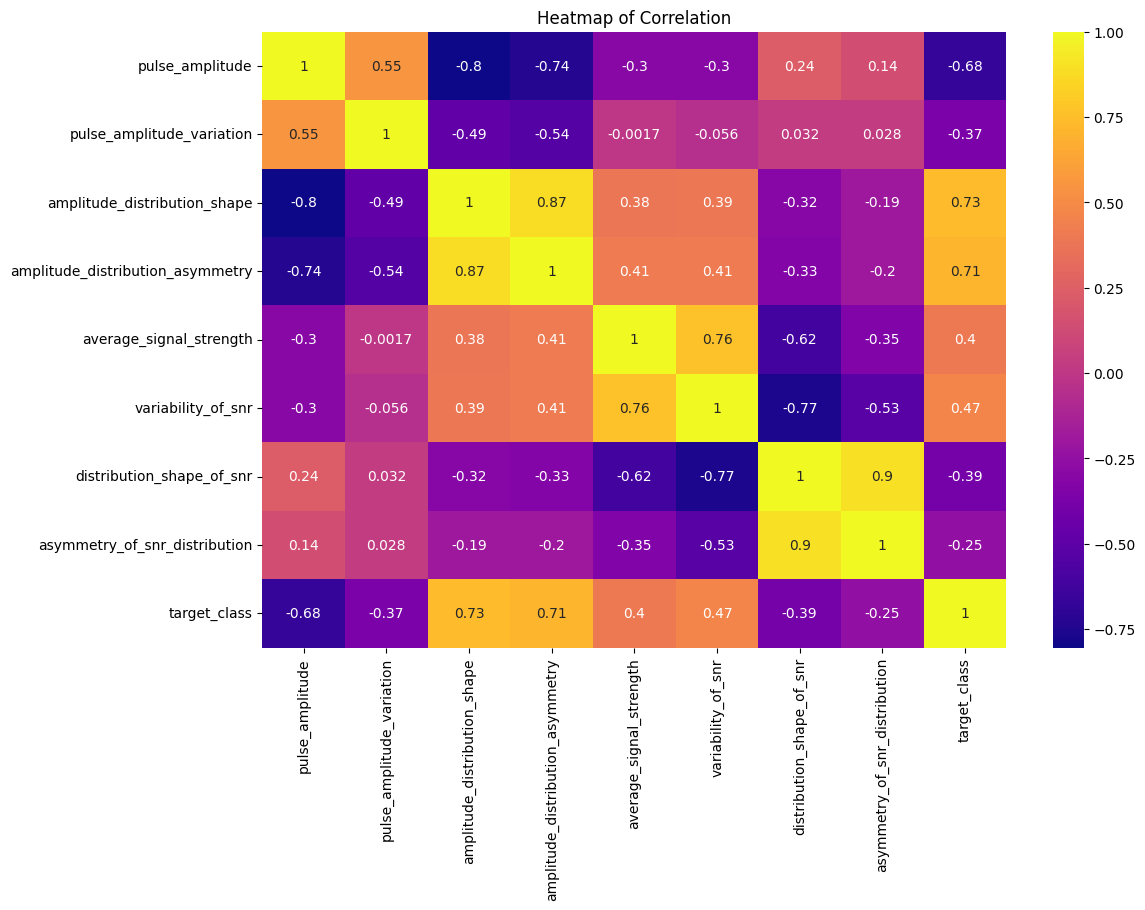

In [14]:
corr_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,cmap="plasma",annot=True)
plt.title("Heatmap of Correlation")

In [15]:
df.corr()["target_class"]

pulse_amplitude                    -0.676129
pulse_amplitude_variation          -0.365757
amplitude_distribution_shape        0.732576
amplitude_distribution_asymmetry    0.707086
average_signal_strength             0.400375
variability_of_snr                  0.470739
distribution_shape_of_snr          -0.389788
asymmetry_of_snr_distribution      -0.252047
target_class                        1.000000
Name: target_class, dtype: float64

### Let's check multicollinearity.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
X_v=df.drop("target_class",axis=1)
vif=pd.DataFrame()
vif["Features"]=X_v.columns
vif["VIF"]=[variance_inflation_factor(X_v.values,i) for i in range(X_v.shape[1])]
print(vif)

                           Features        VIF
0                   pulse_amplitude   3.148253
1         pulse_amplitude_variation   1.688467
2      amplitude_distribution_shape   5.644926
3  amplitude_distribution_asymmetry   4.879526
4           average_signal_strength   3.027339
5                variability_of_snr   4.097474
6         distribution_shape_of_snr  16.242662
7     asymmetry_of_snr_distribution   9.338856


### We have imbalance problem in our dataset.

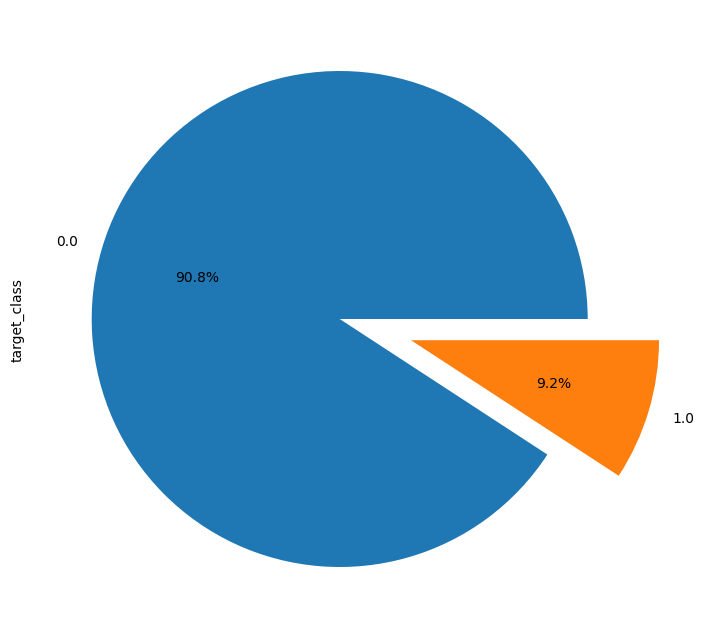

In [18]:
fig,ax=plt.subplots(figsize=(8,10))
explode=[0.0,0.3]
ax=(df["target_class"].value_counts(normalize=True)*100).plot.pie(explode=explode,autopct="%.1f%%")

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [20]:
X = df[["pulse_amplitude", "pulse_amplitude_variation", "amplitude_distribution_asymmetry", "average_signal_strength", "variability_of_snr"]]
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9776536312849162
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2276
         1.0       0.96      0.79      0.87       230

    accuracy                           0.98      2506
   macro avg       0.97      0.89      0.93      2506
weighted avg       0.98      0.98      0.98      2506



In [23]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

[[2268    8]
 [  48  182]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

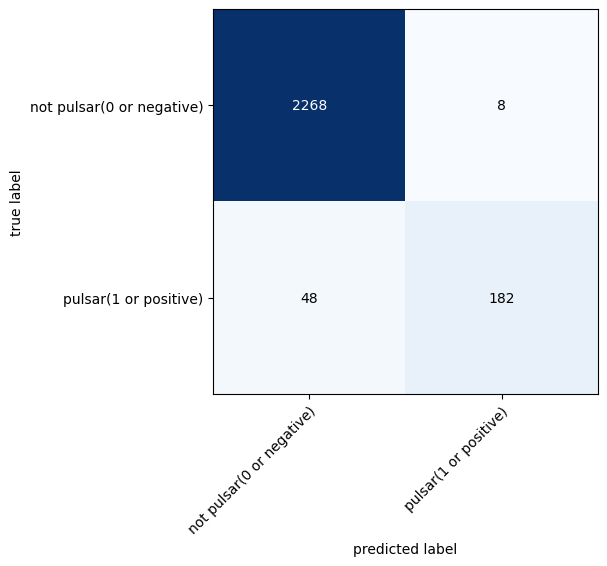

In [24]:
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)
plot_confusion_matrix(conf_matrix,class_names=["not pulsar(0 or negative)","pulsar(1 or positive)"],figsize=(12,5))

### Let's choose best parametres

In [25]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [32]:
cv = StratifiedKFold(n_splits=5,shuffle=True) #I used stratifiedKfold because we have imbalance.
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear',  'rbf'],
  
}

grid_search=GridSearchCV(model,param_grid=params,cv=cv,return_train_score=False)

grid_search.fit(X_train, y_train)
grid_search.cv_results_

{'mean_fit_time': array([0.13757057, 0.33621573, 0.09857168, 0.33693833, 0.09612613,
        0.1864594 , 0.1163003 , 0.15653448, 0.28143682, 0.18489079,
        1.47807417, 0.44806538]),
 'std_fit_time': array([0.00549023, 0.00514337, 0.00794759, 0.00639178, 0.00768679,
        0.01129367, 0.01061877, 0.0053437 , 0.02232524, 0.00551373,
        0.12786766, 0.03427736]),
 'mean_score_time': array([0.02672458, 0.24563837, 0.01946049, 0.24224062, 0.01933532,
        0.13277655, 0.01849346, 0.09295425, 0.01855459, 0.07992291,
        0.01523881, 0.07553868]),
 'std_score_time': array([0.00618079, 0.00342571, 0.00340577, 0.01270516, 0.00279586,
        0.00723276, 0.00235053, 0.00337638, 0.00348433, 0.00280701,
        0.00191239, 0.00699174]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_

### Upper  code not easy to interpret.

In [33]:
results=pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.137571,0.005490,0.026725,0.006181,0.001,linear,"{'C': 0.001, 'kernel': 'linear'}",0.961097,0.955112,0.964072,0.963074,0.956088,0.959889,0.003643,10
1,0.336216,0.005143,0.245638,0.003426,0.001,rbf,"{'C': 0.001, 'kernel': 'rbf'}",0.907731,0.907731,0.908184,0.908184,0.907685,0.907903,0.000230,12
2,0.098572,0.007948,0.019460,0.003406,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.971571,0.963591,0.971058,0.974551,0.969561,0.970066,0.003621,9
3,0.336938,0.006392,0.242241,0.012705,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.960599,0.956110,0.960579,0.963573,0.957585,0.959689,0.002605,11
4,0.096126,0.007687,0.019335,0.002796,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.973566,0.966584,0.969561,0.979541,0.970559,0.971962,0.004397,8
5,0.186459,0.011294,0.132777,0.007233,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.973566,0.967581,0.971058,0.979541,0.973054,0.972960,0.003905,5
6,0.116300,0.010619,0.018493,0.002351,1,linear,"{'C': 1, 'kernel': 'linear'}",0.975062,0.967082,0.969561,0.980040,0.972056,0.972760,0.004500,7
7,0.156534,0.005344,0.092954,0.003376,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.977057,0.969576,0.974052,0.981537,0.975549,0.975554,0.003900,3
8,0.281437,0.022325,0.018555,0.003484,10,linear,"{'C': 10, 'kernel': 'linear'}",0.974564,0.967082,0.970060,0.980040,0.973054,0.972960,0.004374,6
9,0.184891,0.005514,0.079923,0.002807,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.979551,0.974065,0.975050,0.981537,0.977046,0.977450,0.002775,1


In [34]:
results.sort_values(by='rank_test_score', ascending=True)[["param_C","param_kernel","mean_test_score","rank_test_score"]]

,param_C,param_kernel,mean_test_score,rank_test_score
9,10,rbf,0.977450,1
11,100,rbf,0.976751,2
7,1,rbf,0.975554,3
10,100,linear,0.973060,4
5,0.1,rbf,0.972960,5
8,10,linear,0.972960,6
6,1,linear,0.972760,7
4,0.1,linear,0.971962,8
2,0.01,linear,0.970066,9
0,0.001,linear,0.959889,10


In [35]:
grid_search.best_params_

{'C': 10, 'kernel': 'rbf'}

<Axes: xlabel='target_class', ylabel='Density'>

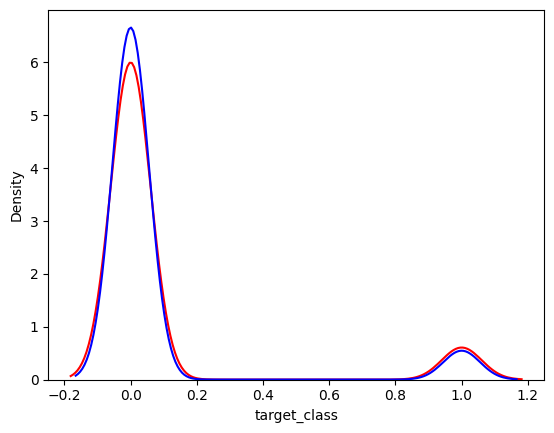

In [36]:
sns.kdeplot(data=y_test,color="red")
sns.kdeplot(data=y_pred,color="blue")

In [37]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9771
Test set score: 0.9777
